# MIDAS results with DARPA

Pour obtenir ses résultats (**Linux**):
1. Dans le fichier `example/Demo.cpp` vérifier que :
    - les lignes 31-33 sont décommentées
`const auto pathMeta = SOLUTION_DIR"data/DARPA/darpa_shape.txt";
const auto pathData = SOLUTION_DIR"data/DARPA/darpa.csv";
const auto pathLabel = SOLUTION_DIR"data/DARPA/darpa_ground_truth.csv";`

    - les lignes 35-37 sont commentées
`const auto pathMeta = SOLUTION_DIR"data/UCI/dataset_shape.txt";
const auto pathData = SOLUTION_DIR"data/UCI/dataset_processed.csv";
const auto pathLabel = SOLUTION_DIR"data/UCI/dataset_ground_truth.csv";`

    - la ligne 95 est décommentée
`const auto pathScore = SOLUTION_DIR"temp/Score_DARPA.txt";`
    - la ligne 96 est commentée 
`const auto pathScore = SOLUTION_DIR"temp/Score_UCI.txt";`

2. Open a terminal
3. cd to the project root MIDAS/
4. cmake -DCMAKE_BUILD_TYPE=Release -S . -B build/release
5. cmake --build build/release --target Demo
6. cd to MIDAS/build/release/
7. ./Demo



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, confusion_matrix

# Open result files

In [2]:
#get label data
data = pd.read_csv('data/DARPA/darpa_ground_truth.csv', names=['Label'])
data

,Label
0,0
1,0
2,0
3,0
4,0
...,...
4554339,0
4554340,0
4554341,0
4554342,0


In [3]:
#get predicted anomaly score
y_pred  = pd.read_csv('temp/Score_DARPA.txt', sep=" ", names=['Prediction'])
y_pred

,Prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4554339,0.0
4554340,0.0
4554341,0.0
4554342,0.0


## Analyse des résultats

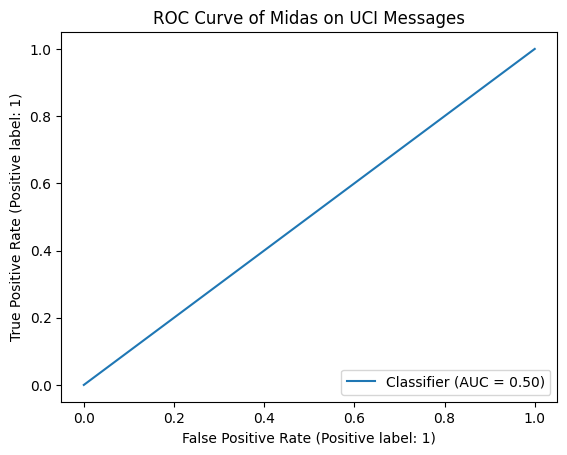

In [4]:
data_true=data[-len(y_pred):] #only select data that are predicted (after tsetup)
RocCurveDisplay.from_predictions(data['Label'], y_pred['Prediction'])
plt.title('ROC Curve of Midas on UCI Messages')
#plt.plot([0,1], [0,1])
plt.show()

In [5]:
fpr, tpr, thresholds = roc_curve(data_true['Label'], y_pred['Prediction'], pos_label = 1)

In [6]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 1.0 with G-Mean: 0.0
FPR: 0.0, TPR: 0.0


In [7]:
data['Prediction'] = np.where(y_pred['Prediction']<thresholdOpt, 0, 1)

data['Prediction'].value_counts()

0    4554344
Name: Prediction, dtype: int64

In [8]:
confusion_matrix(data['Label'], data['Prediction'])

array([[1817135,       0],
       [2737209,       0]])

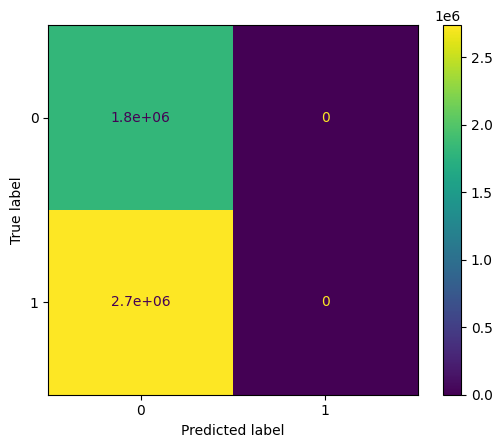

In [9]:
ConfusionMatrixDisplay.from_predictions(data['Label'], data['Prediction'])

In [10]:
TPR=2348710/(387504+2348710)
FPR= 66218/(1594228+ 66218)
print(f'TPR {TPR}')
print(f'FPR {FPR}')

TPR 0.8583794980948127
FPR 0.039879646793692776
